In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
matplotlib.rcParams['figure.figsize'] = [30, 10]
pd.options.display.max_rows = 20
pd.options.display.min_rows = 50
pd.options.display.max_columns = 20

In [2]:
zscores = pd.read_table("20180108_pep_NCPHIPzscores.txt", index_col = 0)
hfc = pd.read_table("avarda/hfc_pubEpitopes.csv", index_col = 0,sep=',')

In [3]:
#np.unique(hfc.columns.str.contains("HIV3_plate_"), return_counts=True)
hfc.columns = hfc.columns.str.replace("HIV3_plate_","p")
hfc = hfc.loc[:,~hfc.columns.str.contains("BEADS_ONLY")]
hfc = hfc.loc[hfc.index.str.contains("mer_") | hfc.index.str.contains("_wild") ,:]


In [4]:
hfc

,p1.A10.1-531-10220-4_08|01|2001.1,p1.A11.1-533-10422-3_02|07|2007.1,p1.A12.1-537-10241-0_09|09|2002.1,p1.A2.1-537-10119-4_09|12|2002.1,p1.A3.1-531-10429-2_03|17|2003.1,p1.A4.1-533-10620-3_10|07|2002.1,p1.A5.1-531-10143-8_12|12|2006.1,p1.A6.1-537-10401-8_10|23|2002.1,p1.A7.1-534-10147-2_09|16|2009.1,p1.A8.1-537-10105-0_05|24|2001.1,...,p5.H10.1-537-10167-6_12|17|2002.1,p5.H11.1-533-10566-4_07|05|2005.1,p5.H12.1-534-10441-9_01|27|2005.1,p5.H2.1-537-10035-2_02|26|2007.1,p5.H3.1-534-10185-7_12|13|2004.1,p5.H4.1-534-10371-1_01|13|2004.1,p5.H6.1-534-10651-8_07|26|2004.1,p5.H7.1-537-10009-9_11|12|2002.1,p5.H8.1-531-10252-2_10|13|2005.1,p5.H9.1-531-10220-4_01|29|2003.1
52925_wildtype_SPPRRPPPGRRPFFHPVAEADYFEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPST,37.82,16.49,126.31,86.35,126.34,209.06,48.04,91.05,38.95,19.56,...,47.10,40.04,31.53,0.00,0.00,16.21,48.74,57.72,21.36,9.07
52925_15mer_start_1_GGGGSSPPRRPPPGRRPFFH,62.06,27.23,139.56,53.27,41.22,43.10,17.32,62.47,0.00,27.54,...,85.58,33.54,76.77,17.04,0.00,10.71,86.95,48.38,33.55,11.34
52925_15mer_start_6_GGGGSPPPGRRPFFHPVAEA,0.00,18.01,142.61,0.00,47.73,47.59,0.00,65.48,58.33,0.00,...,54.51,27.39,0.00,0.00,0.00,8.07,46.84,0.00,16.41,0.00
52925_15mer_start_11_GGGGSRPFFHPVAEADYFEY,6.24,0.00,0.00,7.42,64.67,98.63,22.96,0.00,10.79,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.84,0.00,9.15
52925_15mer_start_16_GGGGSPVAEADYFEYHQEGG,6.18,0.00,0.00,0.00,19.16,0.00,0.00,0.00,7.37,0.00,...,0.00,17.63,0.00,0.00,0.00,16.28,14.97,48.68,0.00,8.56
52925_15mer_start_21_GGGGSDYFEYHQEGGPDGEP,0.00,0.00,0.00,0.00,7.24,35.98,0.00,58.49,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,15.29,8.63,0.00,0.00,9.59
52925_15mer_start_26_GGGGSHQEGGPDGEPDMPPG,0.00,0.00,0.00,58.81,0.00,118.44,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52925_15mer_start_31_GGGGSPDGEPDMPPGAIEQG,0.00,5.51,0.00,64.55,30.17,14.44,0.00,25.15,0.00,21.94,...,0.00,0.00,0.00,0.00,6.86,12.63,17.02,0.00,15.24,0.00
52925_15mer_start_36_GGGGSDMPPGAIEQGPADDP,0.00,0.00,0.00,0.00,41.02,0.00,0.00,0.00,0.00,0.00,...,0.00,38.71,0.00,0.00,0.00,7.94,36.25,0.00,0.00,0.00
52925_15mer_start_41_GGGGSAIEQGPADDPGEGPS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.29,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
wt_set = set([index.split("_")[0] for index in hfc.index])
merscan_wt = set()
for i in hfc.index:
    if "15mer" in i:
        merscan_wt.add(i.split("_")[0])
        
len(wt_set)

536

In [12]:
br = hfc#[hfc.index.str.startswith("58373")]

In [13]:
pos_feat = pd.DataFrame(columns=["seqID", "pos", "aa", "wholePepReact","15merReact", "amount15mers", "20merReact", "amount20mers", "25merReact", "amount25mers", "30merReact", "amount30mers", "35merReact", "amount35mers", "40merReact", "amount40mers", "45merReact", "amount45mers"])
c = 0
numberofseqs = 544
#numberofseqs = 10

for index, row in br.iterrows():
    if "wildtype" in index :
        if c > numberofseqs-1:
            break
        c = c+1
        pos = 0
        seqID = index.split("_")[0]
        seq = index.split("_")[2]
        seq_len = len(seq)
        for aa in seq :
            idx = seqID + "_" + str(pos)
            pos_feat.loc[idx, "seqID"] = seqID
            pos_feat.loc[idx, "pos"] = pos
            pos_feat.loc[idx, "aa"] = aa
            pos_feat.loc[idx, "wholePepReact"] = row.sum()/seq_len
            pos_feat.loc[idx, "alanineReact"] = 0
            pos_feat.loc[idx, "amount15mers"] = 0
            pos_feat.loc[idx, "15merReact"] = 0
            pos_feat.loc[idx, "amount20mers"] = 0
            pos_feat.loc[idx, "20merReact"] = 0
            pos_feat.loc[idx, "amount25mers"] = 0
            pos_feat.loc[idx, "25merReact"] = 0
            pos_feat.loc[idx, "amount30mers"] = 0
            pos_feat.loc[idx, "30merReact"] = 0
            pos_feat.loc[idx, "amount35mers"] = 0
            pos_feat.loc[idx, "35merReact"] = 0
            pos_feat.loc[idx, "amount40mers"] = 0
            pos_feat.loc[idx, "40merReact"] = 0
            pos_feat.loc[idx, "amount45mers"] = 0
            pos_feat.loc[idx, "45merReact"] = 0
            pos = pos + 1
    elif "mer_" in index:
        merString = index.replace(seqID+"_","")[:2]
        merInt = int(merString)    
        if index.split("_")[2] == "Cterm":
            mer_pos = np.max(pos_feat[pos_feat["seqID"]==seqID]["pos"])-merInt+1
        else:
            mer_pos = int(index.split("_")[3])-1
        reactivity = row.sum()/merInt
        for pos_int in range(mer_pos, mer_pos+merInt):
            idx = seqID + "_" + str(pos_int)            
            amount = pos_feat.loc[idx, "amount" + merString + "mers"] + 1
            pos_feat.loc[idx, "amount" + merString + "mers"] = amount
            pos_feat.loc[idx, merString + "merReact"] = ((pos_feat.loc[idx, merString + "merReact"] * (amount-1)) + reactivity ) / amount
        

In [114]:
#pos_feat.to_csv("PEDS_wildtype_positional_features_normalized_noBinarization.csv")
#pos_feat = pd.read_table("PEDS_wildtype_positional_features_normalized_noBinarization.csv", index_col = 0, sep = ",")
pos_feat["seqID"] = pos_feat["seqID"].astype(int)

In [14]:
pos_feat#[pos_feat["seqID"]==23325]

,seqID,pos,aa,wholePepReact,15merReact,amount15mers,20merReact,amount20mers,25merReact,amount25mers,30merReact,amount30mers,35merReact,amount35mers,40merReact,amount40mers,45merReact,amount45mers,alanineReact
52925_0,52925,0,S,386.15,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,0.0
52925_1,52925,1,P,386.15,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,0.0
52925_2,52925,2,P,386.15,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,0.0
52925_3,52925,3,R,386.15,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,0.0
52925_4,52925,4,R,386.15,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,0.0
52925_5,52925,5,P,386.15,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,0.0
52925_6,52925,6,P,386.15,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,0.0
52925_7,52925,7,P,386.15,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,0.0
52925_8,52925,8,G,386.15,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,0.0
52925_9,52925,9,R,386.15,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,0.0


In [30]:
pos_feat[pos_feat.index.str.startswith("58373")]

,seqID,pos,aa,wholePepReact,alanineReact,15merReact,amount15mers,20merReact,amount20mers,25merReact,amount25mers,30merReact,amount30mers,35merReact,amount35mers,40merReact,amount40mers,45merReact,amount45mers,alanineDiff
58373_0,58373,0,M,9.725893,0.0,133.814,1,72.3355,1,20.0492,1,36.382333,1,18.992857,1,25.161,1,16.616444,1,9.725893
58373_1,58373,1,S,9.725893,0.448214,133.814,1,72.3355,1,20.0492,1,36.382333,1,18.992857,1,25.161,1,16.616444,1,9.277679
58373_2,58373,2,K,9.725893,0.8675,133.814,1,72.3355,1,20.0492,1,36.382333,1,18.992857,1,25.161,1,16.616444,1,8.858393
58373_3,58373,3,E,9.725893,0.942738,133.814,1,72.3355,1,20.0492,1,36.382333,1,18.992857,1,25.161,1,16.616444,1,8.783155
58373_4,58373,4,I,9.725893,1.04494,133.814,1,72.3355,1,20.0492,1,36.382333,1,18.992857,1,25.161,1,16.616444,1,8.680952
58373_5,58373,5,P,9.725893,0.47625,75.875667,2,37.95125,2,11.6632,2,19.814167,2,11.059429,2,13.490375,2,9.028889,2,9.249643
58373_6,58373,6,T,9.725893,0.825179,75.875667,2,37.95125,2,11.6632,2,19.814167,2,11.059429,2,13.490375,2,9.028889,2,8.900714
58373_7,58373,7,P,9.725893,0.792381,75.875667,2,37.95125,2,11.6632,2,19.814167,2,11.059429,2,13.490375,2,9.028889,2,8.933512
58373_8,58373,8,Y,9.725893,0.86006,75.875667,2,37.95125,2,11.6632,2,19.814167,2,11.059429,2,13.490375,2,9.028889,2,8.865833
58373_9,58373,9,M,9.725893,0.614643,75.875667,2,37.95125,2,11.6632,2,19.814167,2,11.059429,2,13.490375,2,9.028889,2,9.11125


In [31]:
seqIDs = pos_feat["seqID"].unique()

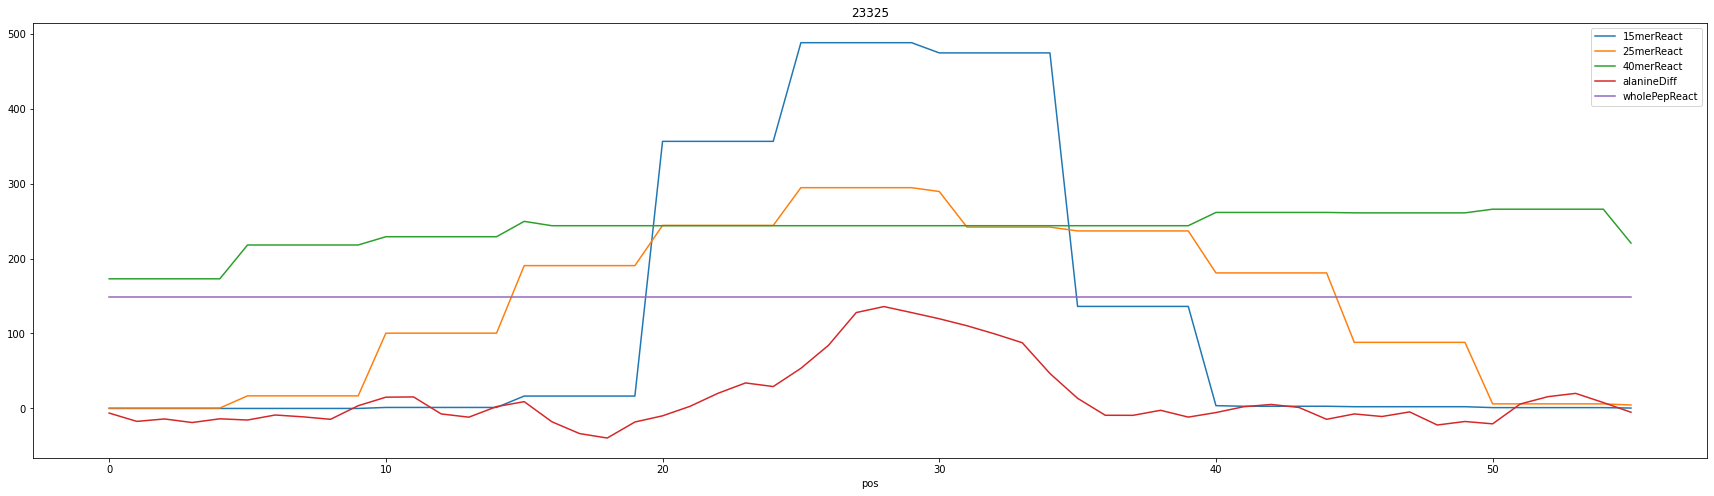

In [61]:
pos_feat[pos_feat["seqID"] == 23325].plot.line(x="pos", y=["15merReact","25merReact","40merReact", "wholePepReact"], title = str(23325)).figure.savefig("./figures/23325_mers_over_position_v1.pdf")

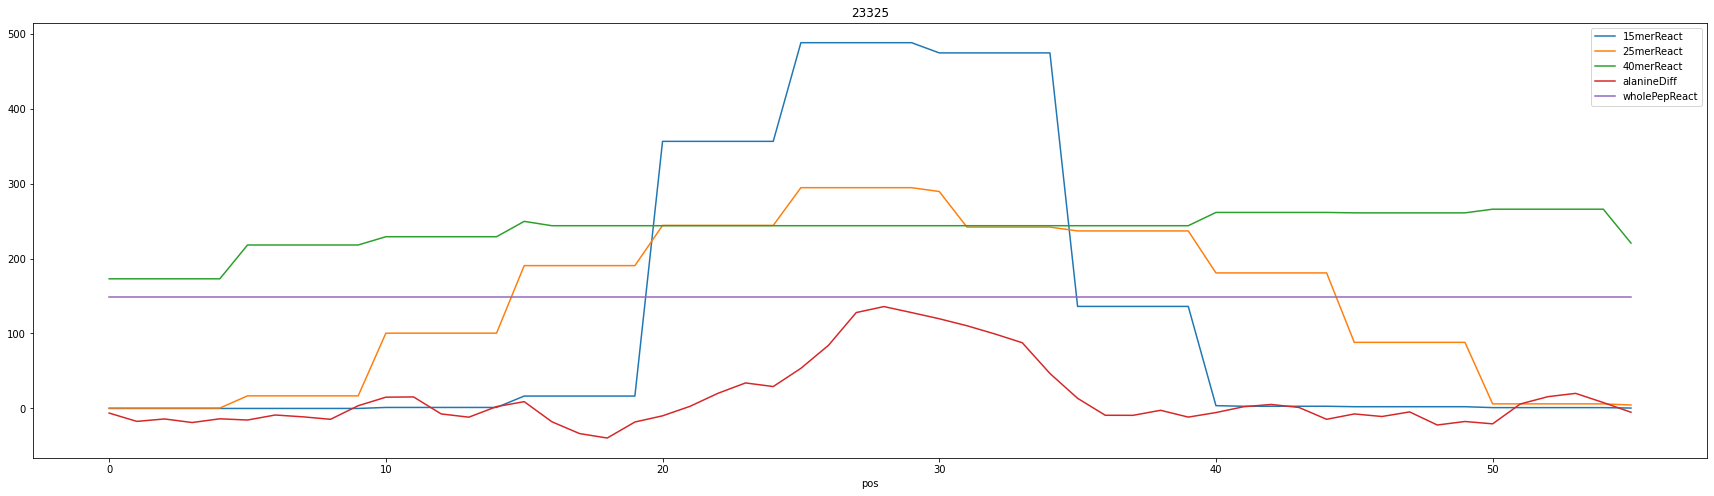

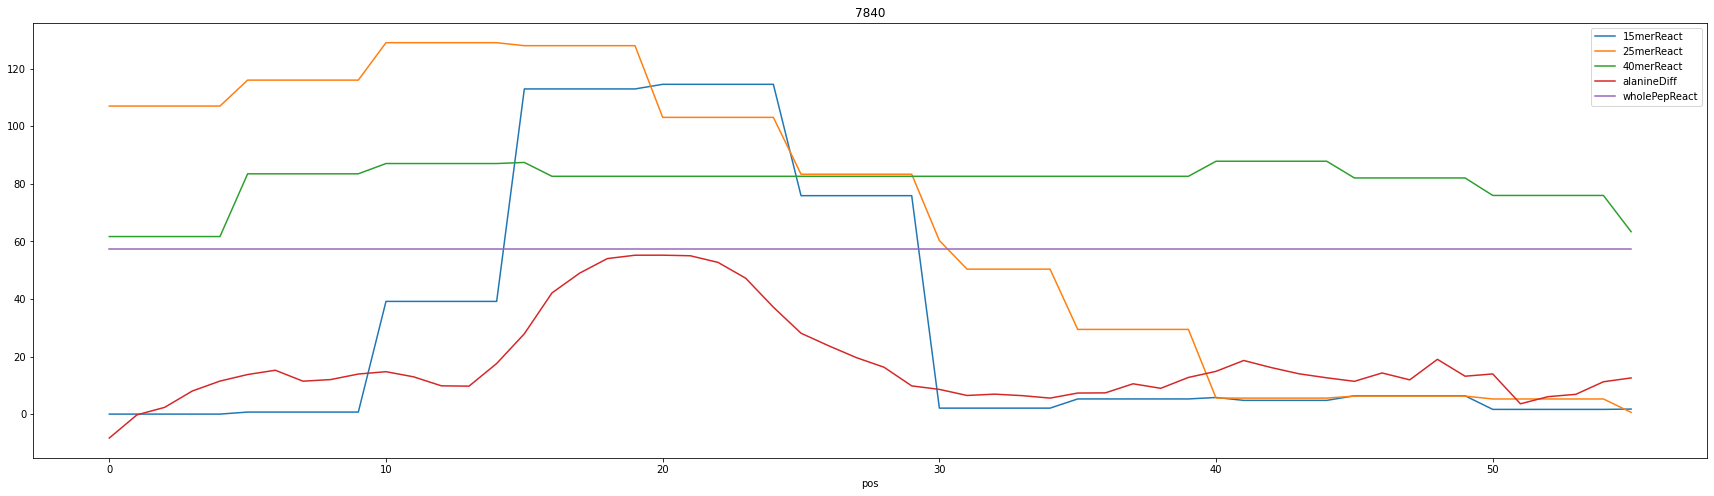

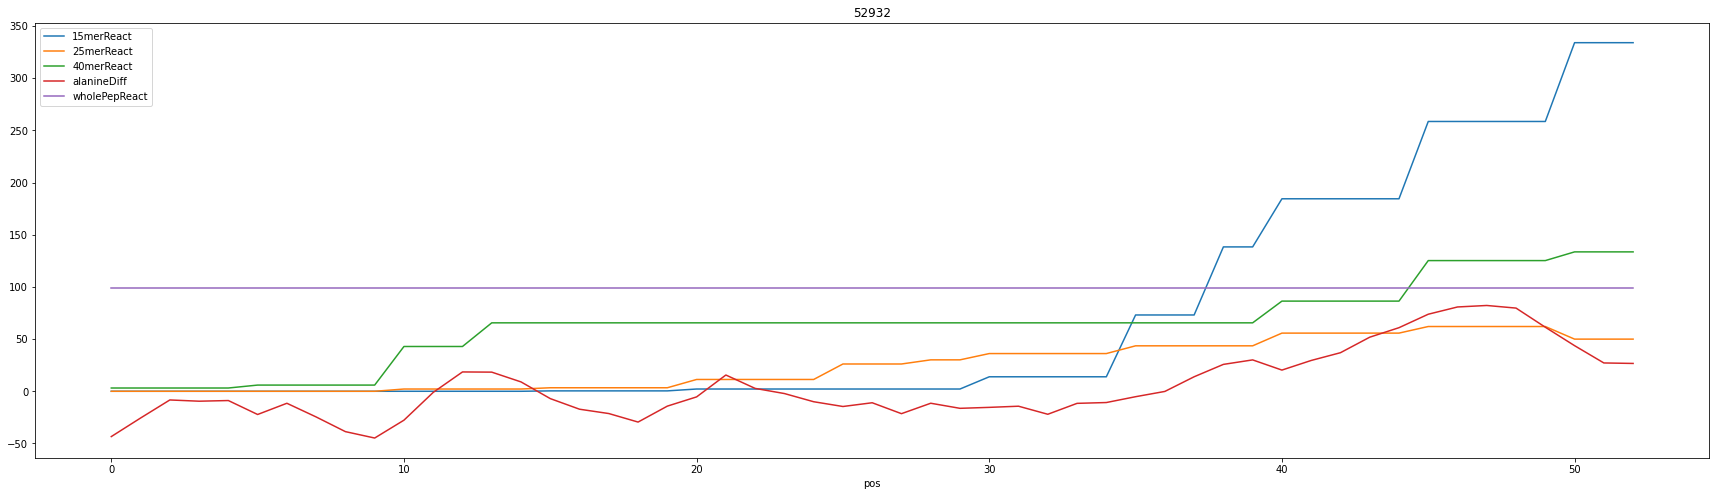

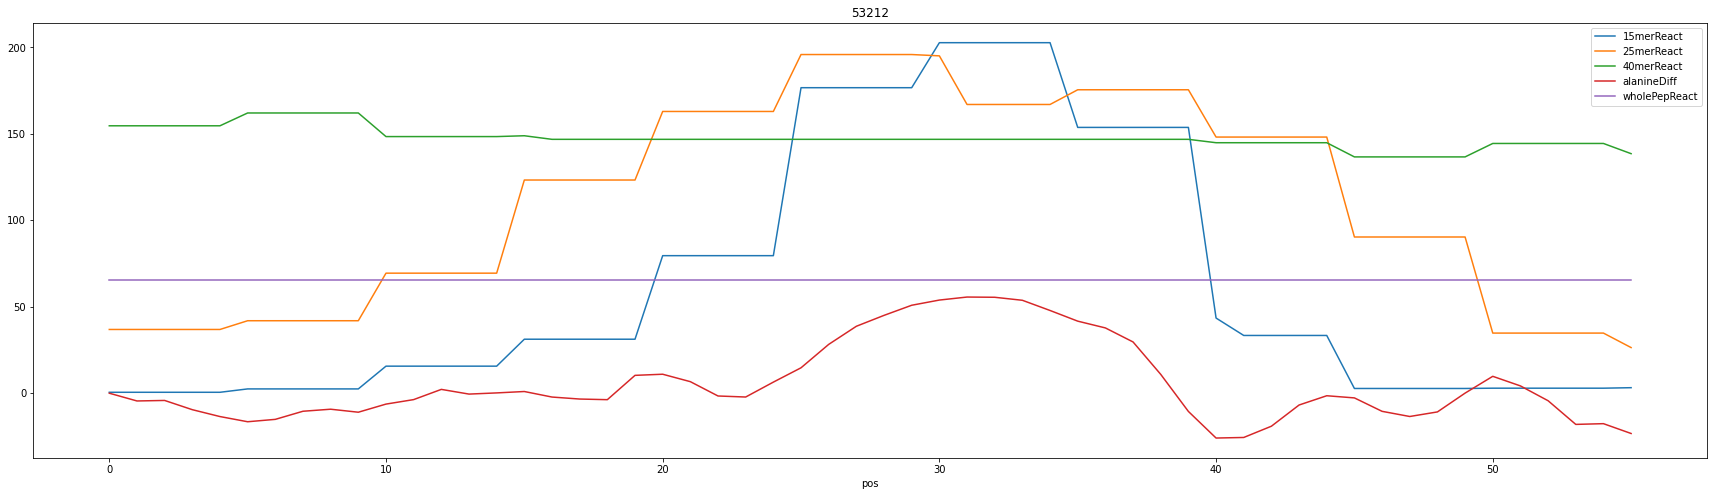

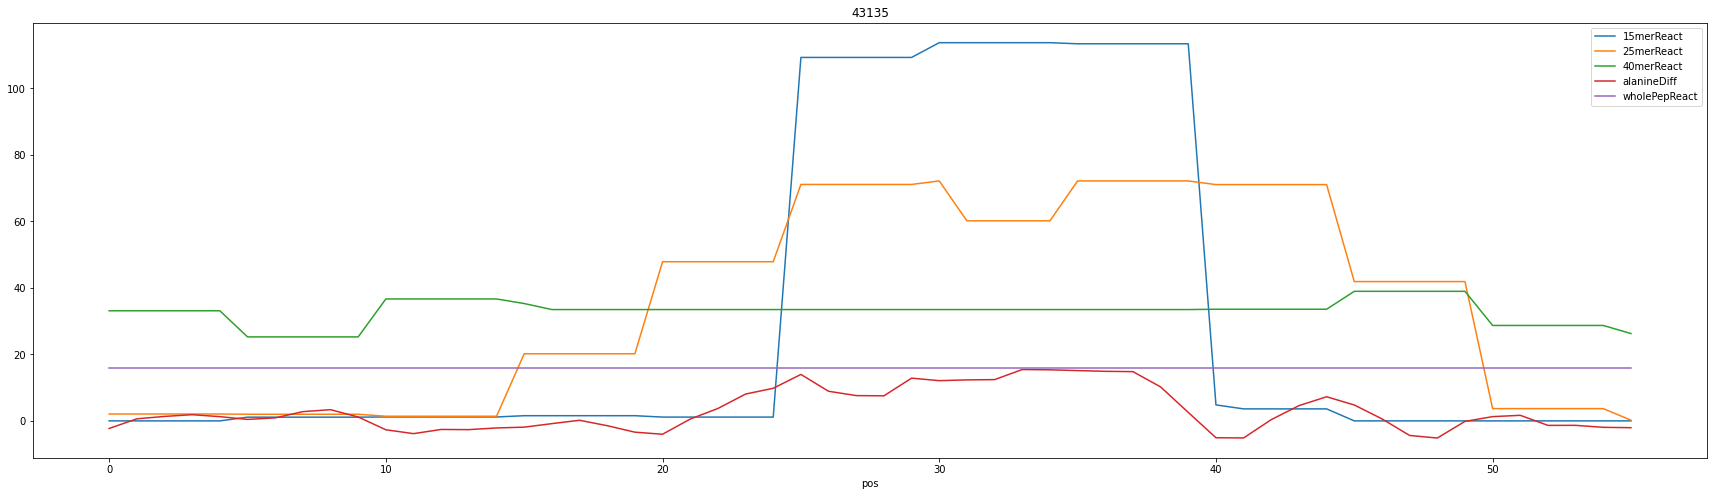

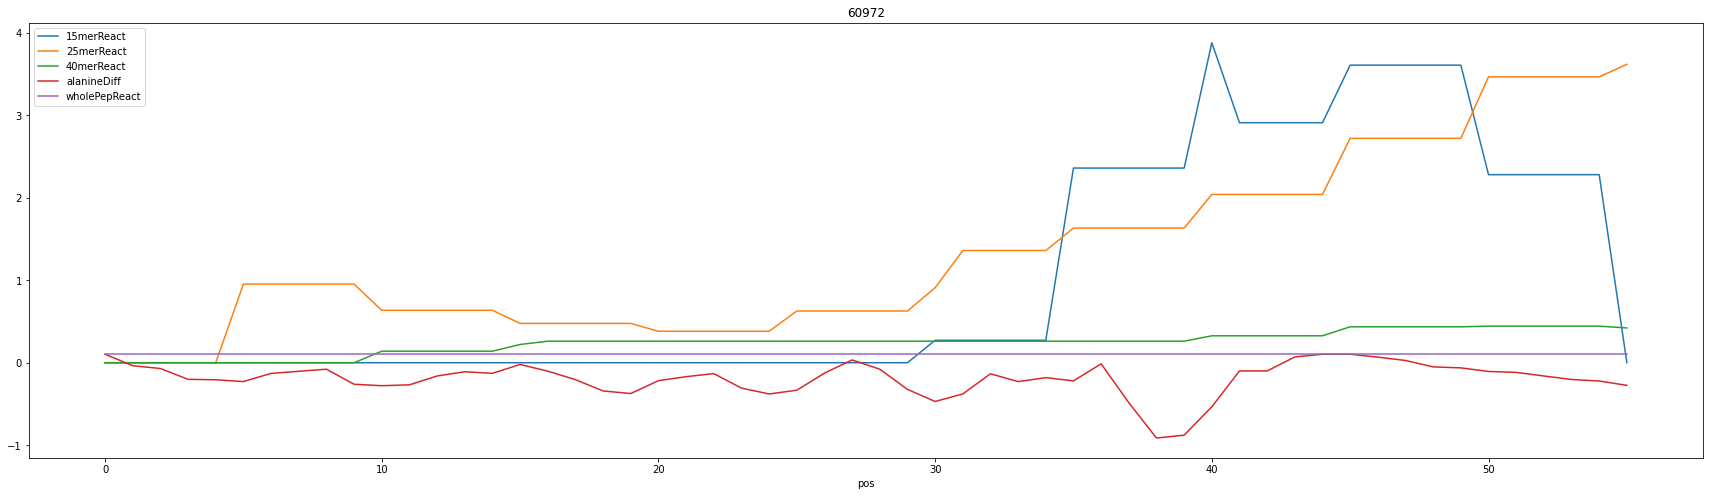

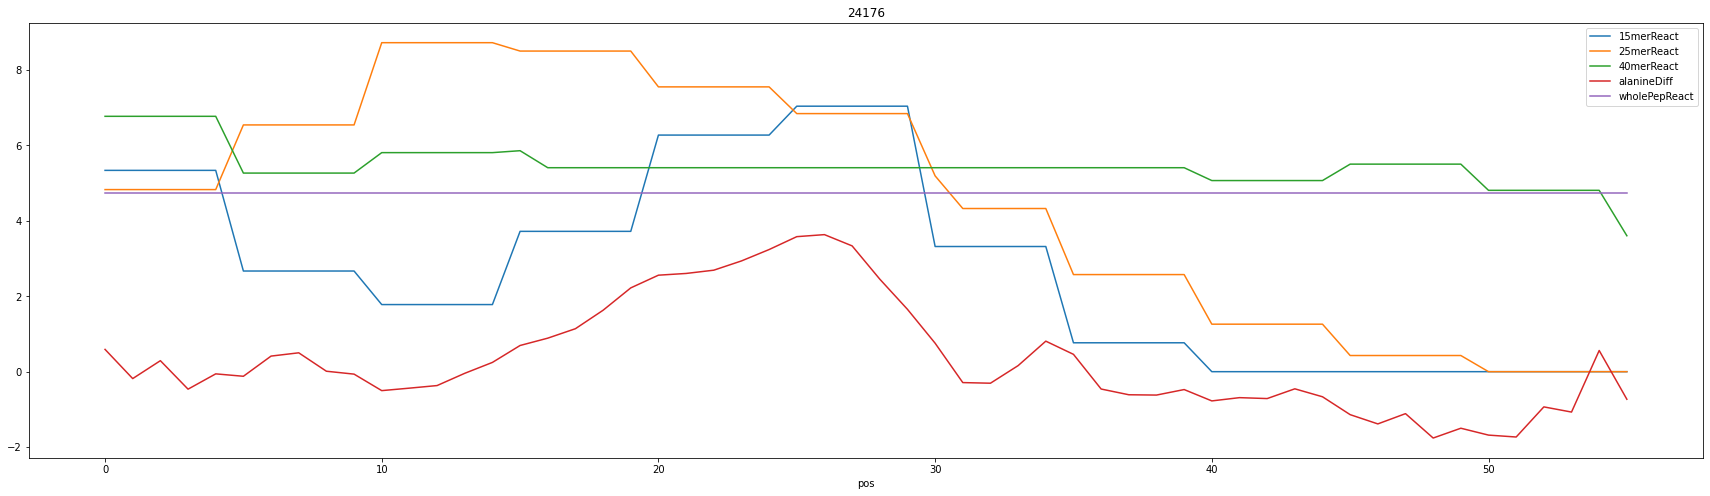

In [62]:
matplotlib.rcParams['figure.figsize'] = [30, 8]
random_seqs = ["23325","7840","52932","53212","43135","60972","24176"]
random_seqs = [23325,7840,52932,53212,43135,60972,24176]
for s in random_seqs:
    pos_feat[pos_feat["seqID"] == s].plot.line(x="pos", y=["15merReact","25merReact","40merReact", "alanineDiff", "wholePepReact"], title = str(s)).figure.savefig("./figures/"+str(s)+"_mers_over_position_v1.pdf")

In [19]:
random_seqs

[23325, 7840, 52932, 53212, 43135, 60972, 24176]

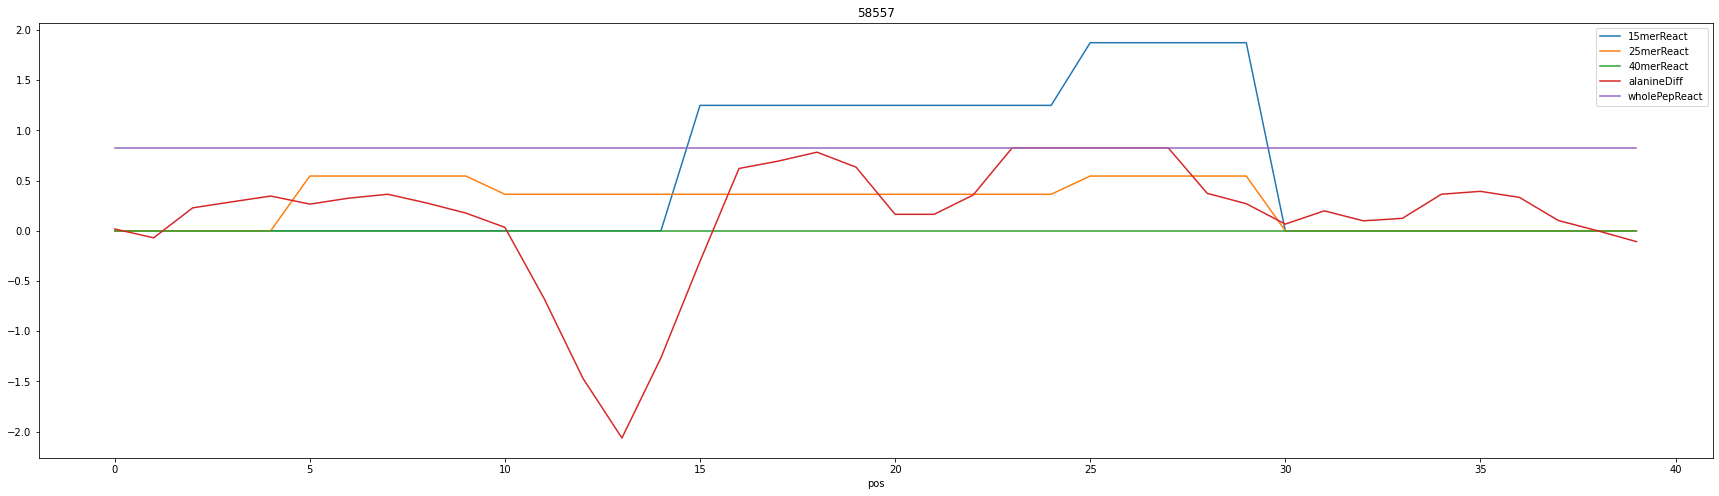

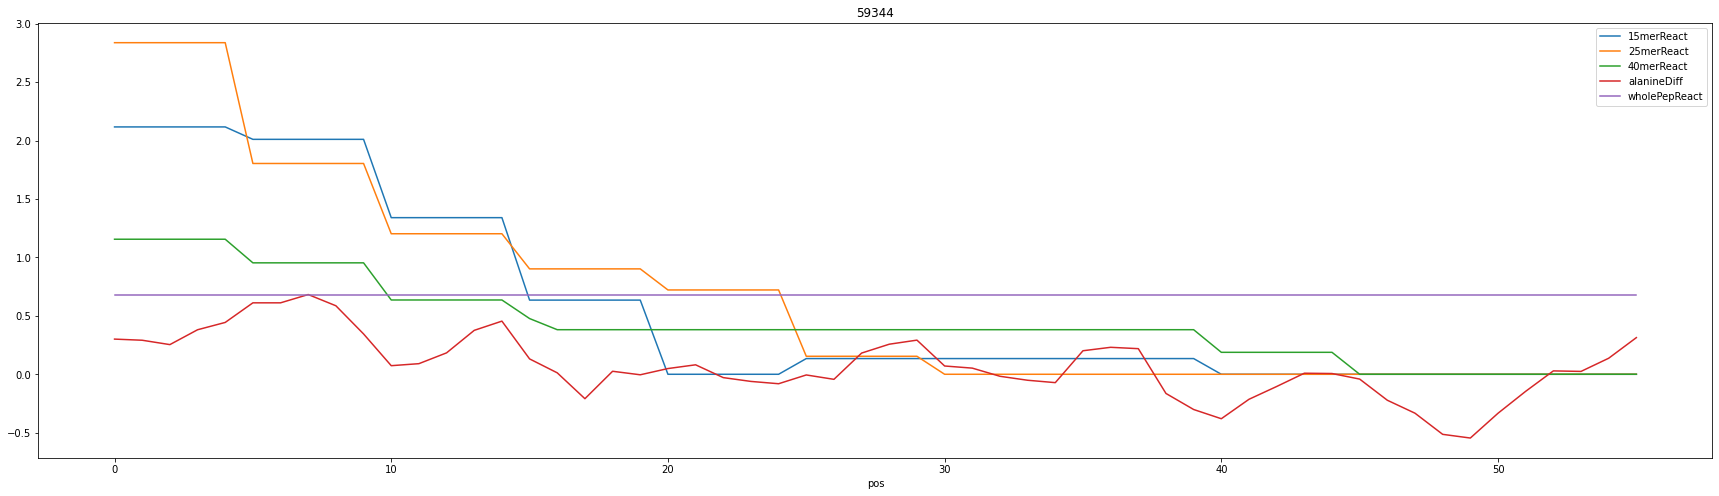

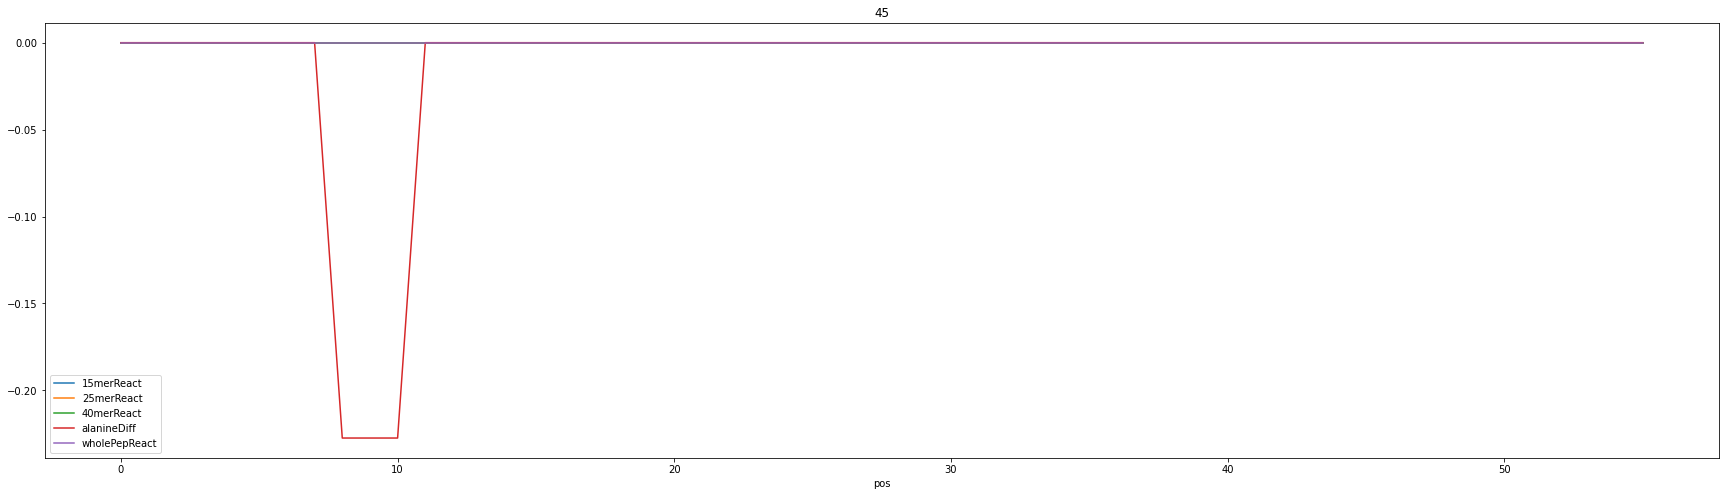

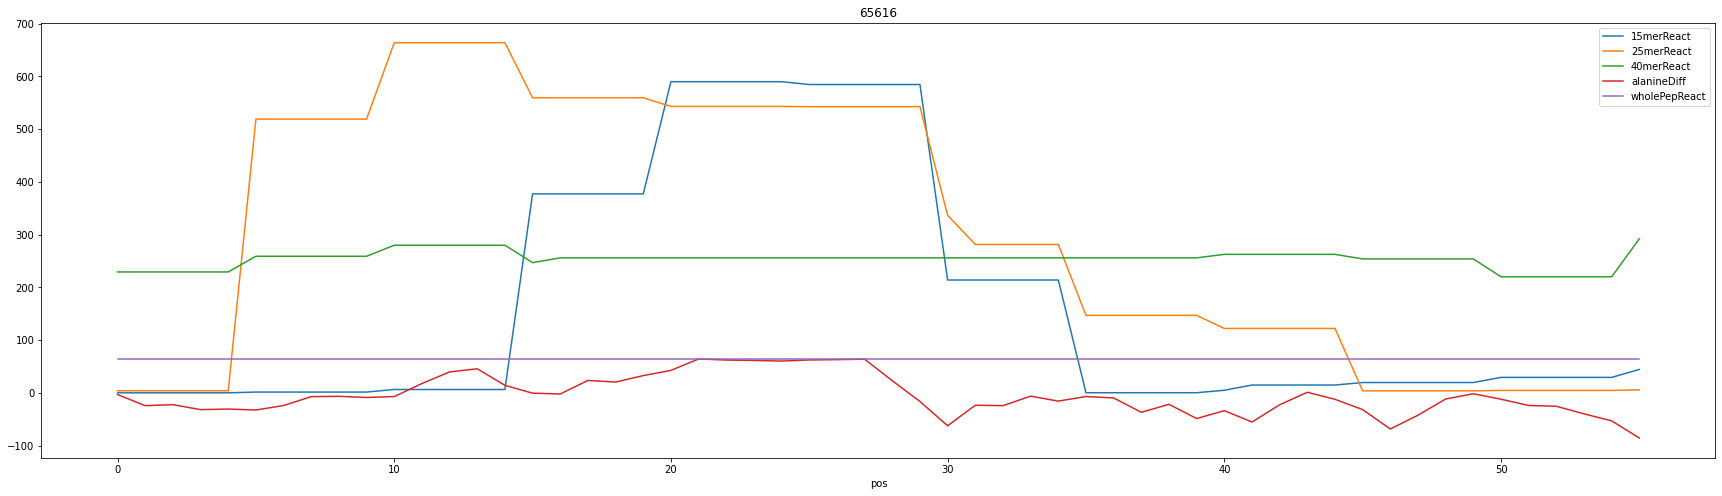

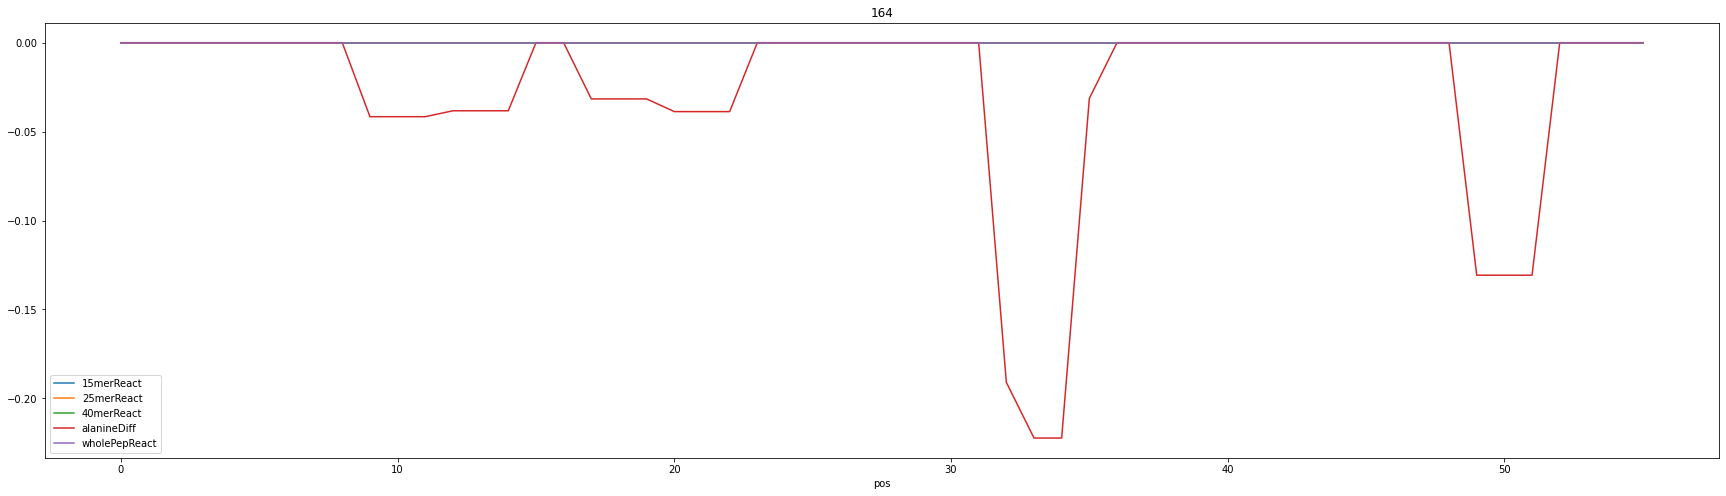

In [60]:
random_seqs = random.choices(seqIDs, k=5)
for s in random_seqs:
    pos_feat[pos_feat["seqID"] == s].plot.line(x="pos", y=["15merReact","25merReact","40merReact", "wholePepReact"], title = str(s))

In [85]:
pos_feat

,seqID,pos,aa,wholePepReact,alanineReact,15merReact,amount15mers,20merReact,amount20mers,25merReact,amount25mers,30merReact,amount30mers,35merReact,amount35mers,40merReact,amount40mers,45merReact,amount45mers,alanineDiff
52925_0,52925,0,S,386.15,469.46,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,-83.31
52925_1,52925,1,P,386.15,401.456964,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,-15.306964
52925_2,52925,2,P,386.15,404.131667,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,-17.981667
52925_3,52925,3,R,386.15,369.949643,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,16.200357
52925_4,52925,4,R,386.15,397.469405,1106.335333,1,899.112,1,549.2968,1,686.19,1,625.624571,1,542.6025,1,438.950222,1,-11.319405
52925_5,52925,5,P,386.15,382.852143,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,3.297857
52925_6,52925,6,P,386.15,367.472738,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,18.677262
52925_7,52925,7,P,386.15,327.807917,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,58.342083
52925_8,52925,8,G,386.15,293.396786,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,92.753214
52925_9,52925,9,R,386.15,295.373452,910.471333,2,722.41525,2,572.1722,2,639.377667,2,556.786,2,511.10725,2,438.077778,2,90.776548


# violins

In [35]:
merscan_index = [i.split("_")[0] in merscan_wt for i in hfc.index]

In [36]:
hfc2 = hfc.iloc[merscan_index,:]
hfc2 = hfc2.loc[~hfc2.index.str.contains("_A[1-9]"),:]
hfc2

,p1.A10.1-531-10220-4_08|01|2001.1,p1.A11.1-533-10422-3_02|07|2007.1,p1.A12.1-537-10241-0_09|09|2002.1,p1.A2.1-537-10119-4_09|12|2002.1,p1.A3.1-531-10429-2_03|17|2003.1,p1.A4.1-533-10620-3_10|07|2002.1,p1.A5.1-531-10143-8_12|12|2006.1,p1.A6.1-537-10401-8_10|23|2002.1,p1.A7.1-534-10147-2_09|16|2009.1,p1.A8.1-537-10105-0_05|24|2001.1,...,p5.H10.1-537-10167-6_12|17|2002.1,p5.H11.1-533-10566-4_07|05|2005.1,p5.H12.1-534-10441-9_01|27|2005.1,p5.H2.1-537-10035-2_02|26|2007.1,p5.H3.1-534-10185-7_12|13|2004.1,p5.H4.1-534-10371-1_01|13|2004.1,p5.H6.1-534-10651-8_07|26|2004.1,p5.H7.1-537-10009-9_11|12|2002.1,p5.H8.1-531-10252-2_10|13|2005.1,p5.H9.1-531-10220-4_01|29|2003.1
52925_wildtype_SPPRRPPPGRRPFFHPVAEADYFEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPST,37.82,16.49,126.31,86.35,126.34,209.06,48.04,91.05,38.95,19.56,...,47.10,40.04,31.53,0.00,0.00,16.21,48.74,57.72,21.36,9.07
52925_15mer_start_1_GGGGSSPPRRPPPGRRPFFH,62.06,27.23,139.56,53.27,41.22,43.10,17.32,62.47,0.00,27.54,...,85.58,33.54,76.77,17.04,0.00,10.71,86.95,48.38,33.55,11.34
52925_15mer_start_6_GGGGSPPPGRRPFFHPVAEA,0.00,18.01,142.61,0.00,47.73,47.59,0.00,65.48,58.33,0.00,...,54.51,27.39,0.00,0.00,0.00,8.07,46.84,0.00,16.41,0.00
52925_15mer_start_11_GGGGSRPFFHPVAEADYFEY,6.24,0.00,0.00,7.42,64.67,98.63,22.96,0.00,10.79,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.84,0.00,9.15
52925_15mer_start_16_GGGGSPVAEADYFEYHQEGG,6.18,0.00,0.00,0.00,19.16,0.00,0.00,0.00,7.37,0.00,...,0.00,17.63,0.00,0.00,0.00,16.28,14.97,48.68,0.00,8.56
52925_15mer_start_21_GGGGSDYFEYHQEGGPDGEP,0.00,0.00,0.00,0.00,7.24,35.98,0.00,58.49,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,15.29,8.63,0.00,0.00,9.59
52925_15mer_start_26_GGGGSHQEGGPDGEPDMPPG,0.00,0.00,0.00,58.81,0.00,118.44,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52925_15mer_start_31_GGGGSPDGEPDMPPGAIEQG,0.00,5.51,0.00,64.55,30.17,14.44,0.00,25.15,0.00,21.94,...,0.00,0.00,0.00,0.00,6.86,12.63,17.02,0.00,15.24,0.00
52925_15mer_start_36_GGGGSDMPPGAIEQGPADDP,0.00,0.00,0.00,0.00,41.02,0.00,0.00,0.00,0.00,0.00,...,0.00,38.71,0.00,0.00,0.00,7.94,36.25,0.00,0.00,0.00
52925_15mer_start_41_GGGGSAIEQGPADDPGEGPS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.29,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
reactivity=pd.DataFrame(columns=["mer","reactivity"], index=hfc2.index)

In [38]:
reactivity["reactivity"] = hfc2.sum(axis=1)
reactivity["log(reactivity)"] = np.log(reactivity["reactivity"]+1)

In [39]:
for index, row in reactivity.iterrows():
    if "wildtype" in index :
        seqID = index.split("_")[0]
        reactivity.loc[index, "mer"] = "wildtype"
    elif "mer_" in index:
        merString = index.replace(seqID+"_","")[:5]
        reactivity.loc[index, "mer"] = merString

In [40]:
reactivity = reactivity.sort_index()

<AxesSubplot:xlabel='mer', ylabel='reactivity'>

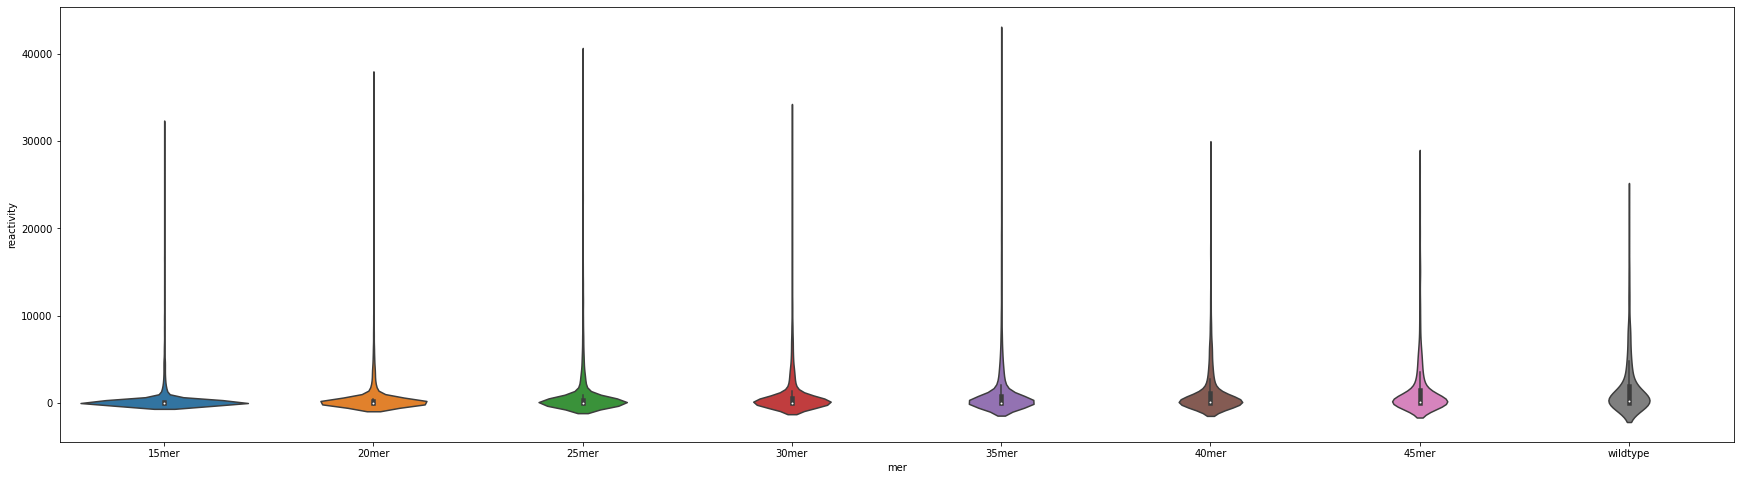

In [41]:
sns.violinplot(x="mer", y="reactivity", data=reactivity)

<AxesSubplot:xlabel='mer', ylabel='reactivity'>

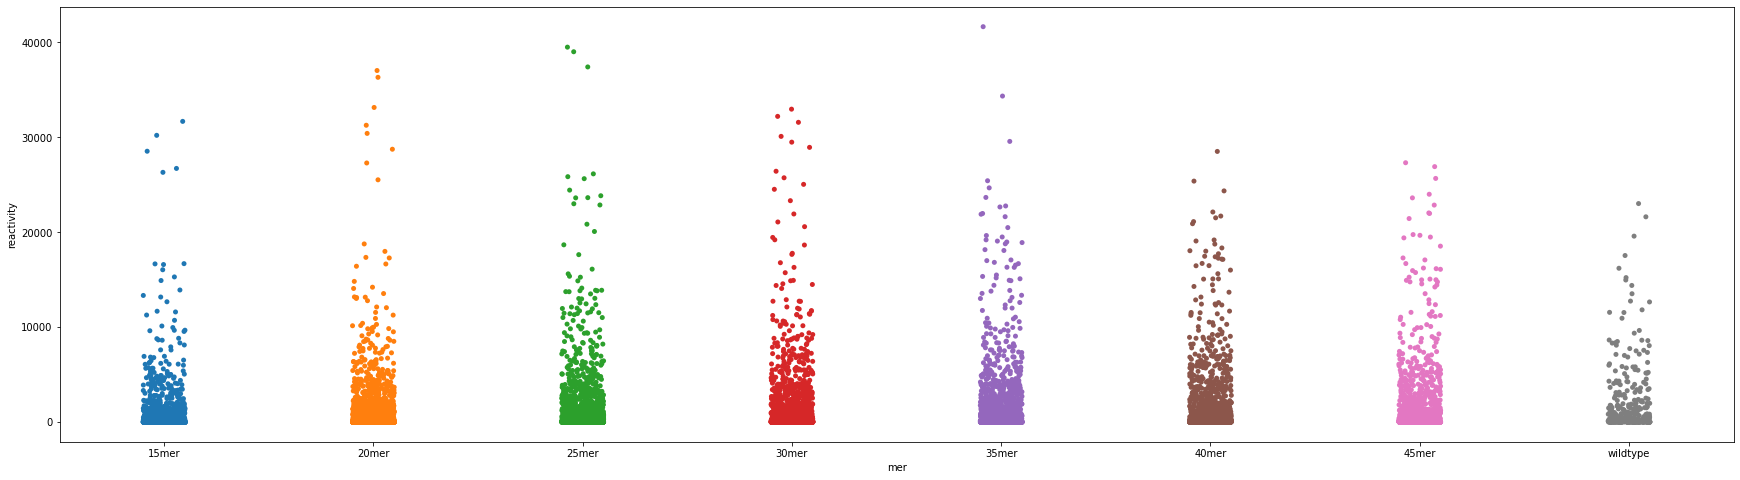

In [42]:
sns.stripplot(x="mer", y="reactivity", data=reactivity)

<AxesSubplot:xlabel='mer', ylabel='log(reactivity)'>

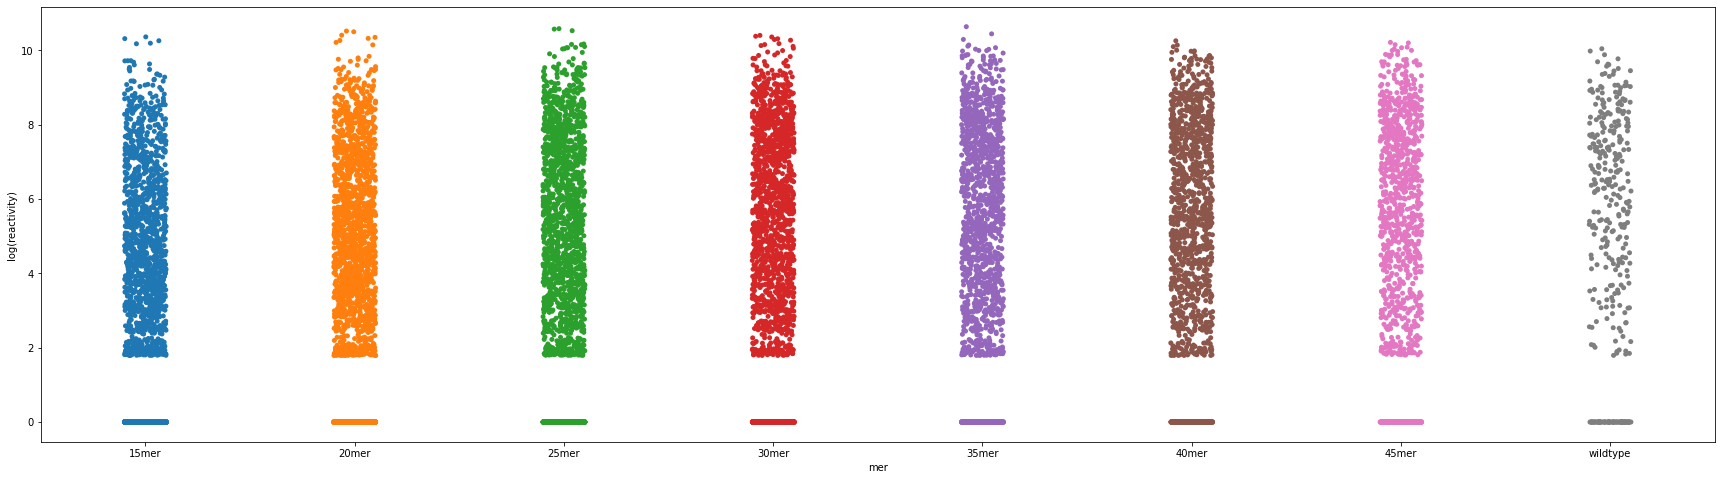

In [43]:
sns.stripplot(x="mer", y="log(reactivity)", data=reactivity)

/home/anna/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='mer', ylabel='log(reactivity)'>

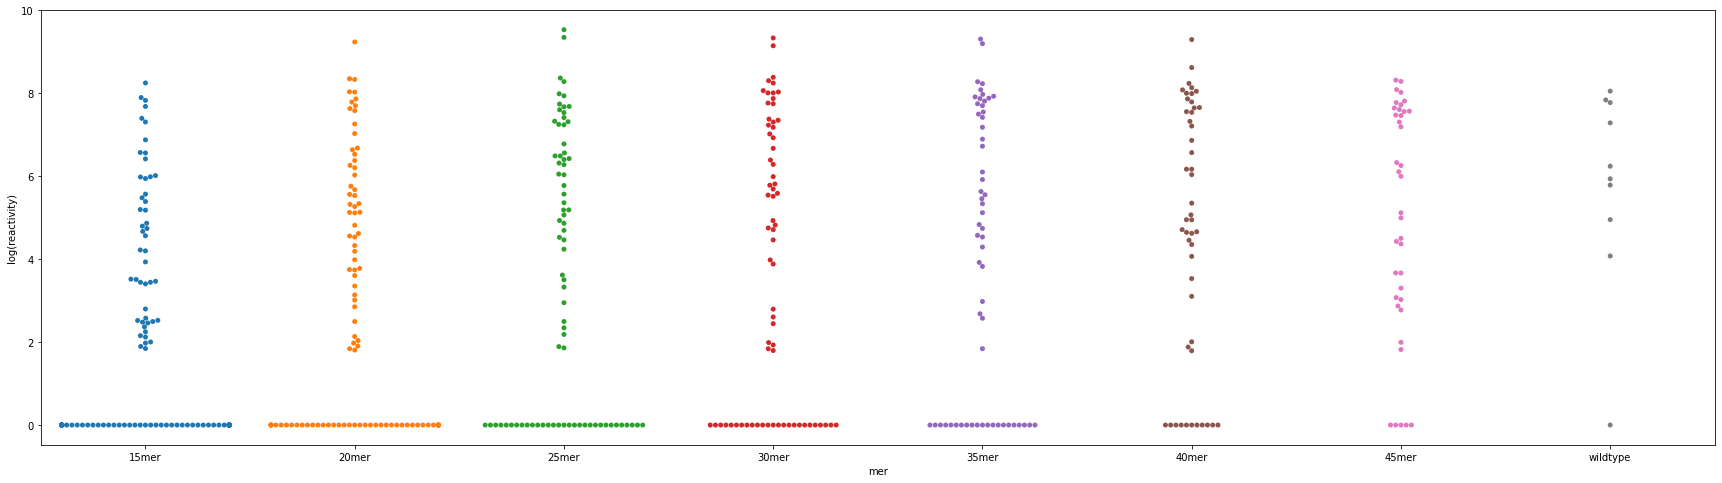

In [44]:
react_sample = reactivity.iloc[:500,:]
sns.swarmplot(x="mer", y="log(reactivity)", data=react_sample)

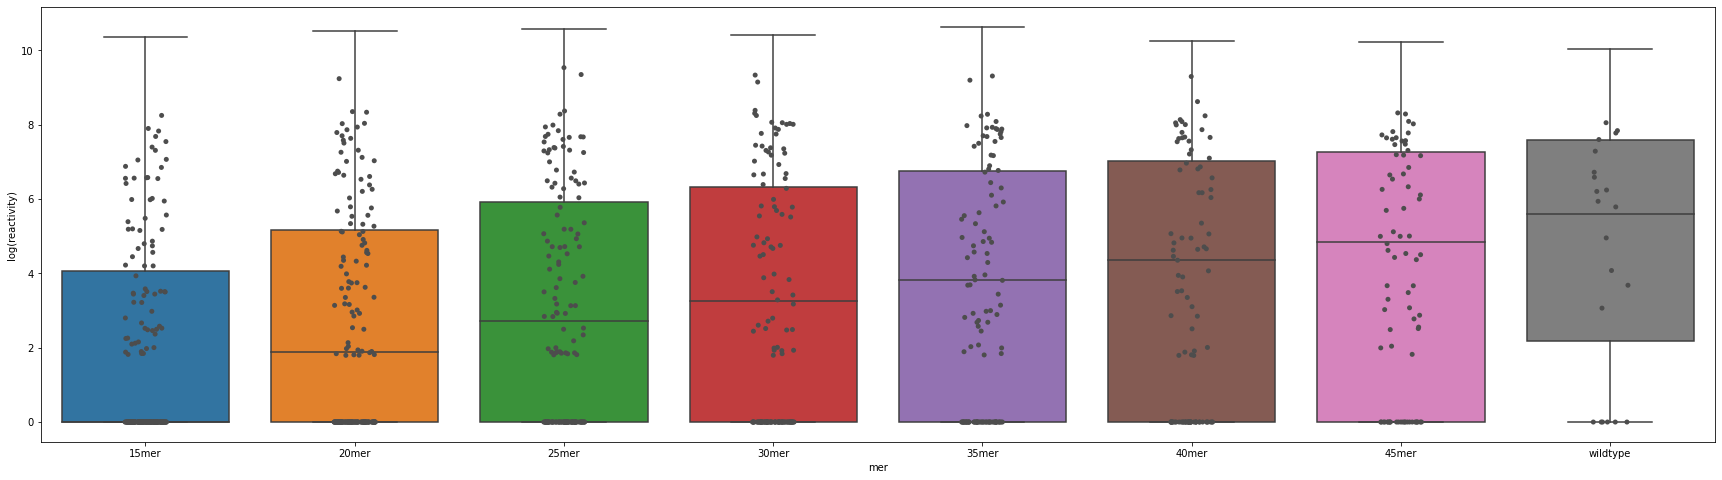

In [45]:
ax = sns.boxplot(x="mer", y="log(reactivity)", data=reactivity, whis=np.inf)
react_sample = reactivity.iloc[:1000,:]
ax = sns.stripplot(x="mer", y="log(reactivity)", data=react_sample, color=".3")

In [46]:
reactivity["merAsNum"] = reactivity["mer"].str.replace("mer","").str.replace("wildtype","54").astype(int)
reactivity["reactivityPerAA"] = reactivity["reactivity"]/reactivity["merAsNum"]
reactivity["log(reactivityPerAA)"] = np.log(reactivity["reactivityPerAA"]+1)

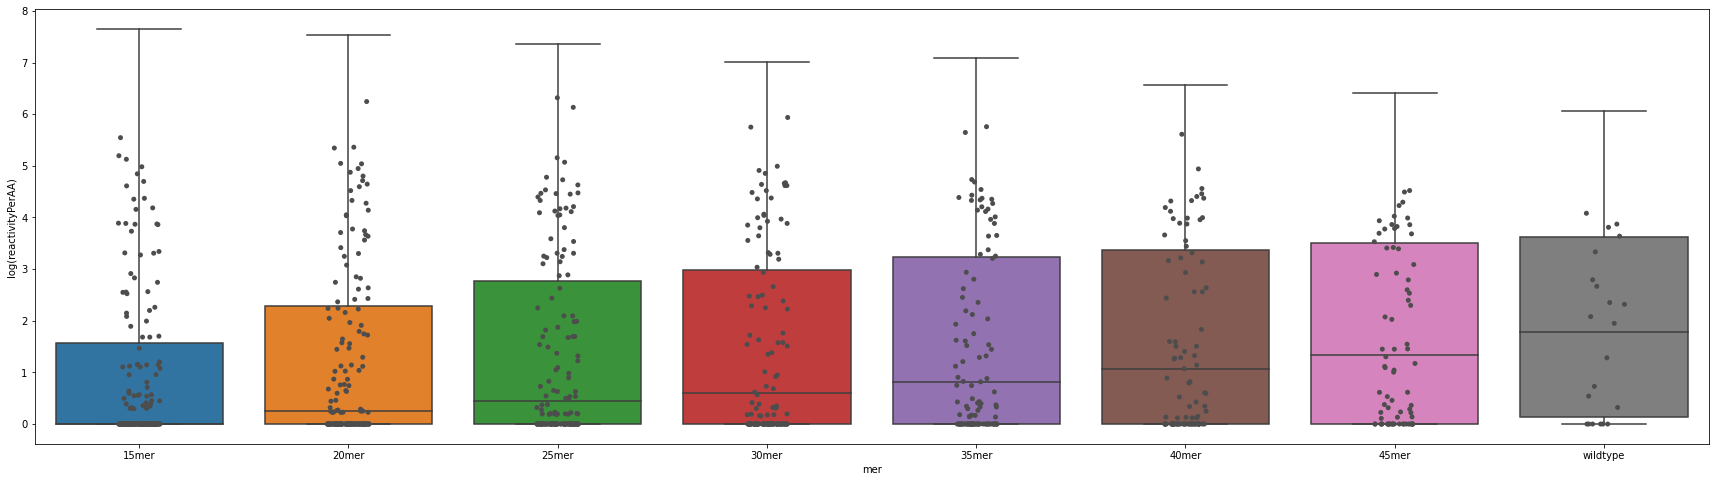

In [47]:
ax = sns.boxplot(x="mer", y="log(reactivityPerAA)", data=reactivity, whis=np.inf)
react_sample = reactivity.iloc[:1000,:]
ax = sns.stripplot(x="mer", y="log(reactivityPerAA)", data=react_sample, color=".3")

In [49]:
# spagetti plot of average reactivity per mer for ~10 sequences
mers = np.unique([split[1] for split in hfc2.index.str.split("_")])
t = []
for w in merscan_wt:
    t.append(w)
random_seqs = random.choices(t, k=7)
rmersdf = pd.DataFrame(index=mers,columns=[random_seqs])
rmersdf["mers"] = mers
for seqID in random_seqs:
    subr = reactivity.loc[reactivity.index.str.startswith(seqID+"_"),:]
    for mer in mers:
        rmersdf.loc[mer,seqID] = np.mean(subr.loc[subr.index.str.contains(mer),"reactivity"])
rmersdf  

,9709,24987,42577,82766,50266,49030,41937,mers
15mer,636.148333,15.646,2.736,58.635,88.878333,538.488,2.915,15mer
20mer,1059.038,20.714444,0.627778,106.793333,143.816,1887.462222,8.234,20mer
25mer,1186.89,30.1725,0.0,257.47125,473.765,2571.64,4.8275,25mer
30mer,1916.986667,30.978571,0.0,222.8,476.443333,2822.138571,0.0,30mer
35mer,2549.035,34.858333,2.073333,117.626667,803.175,3984.098333,0.0,35mer
40mer,NaN,19.152,0.0,92.968,660.33,4892.478,NaN,40mer
45mer,NaN,43.9075,0.0,61.2575,NaN,4803.7325,NaN,45mer
wildtype,3128.52,0.0,0.0,211.49,499.24,5853.95,0.0,wildtype


<AxesSubplot:title={'center':'Mean Reactivity per k'}>

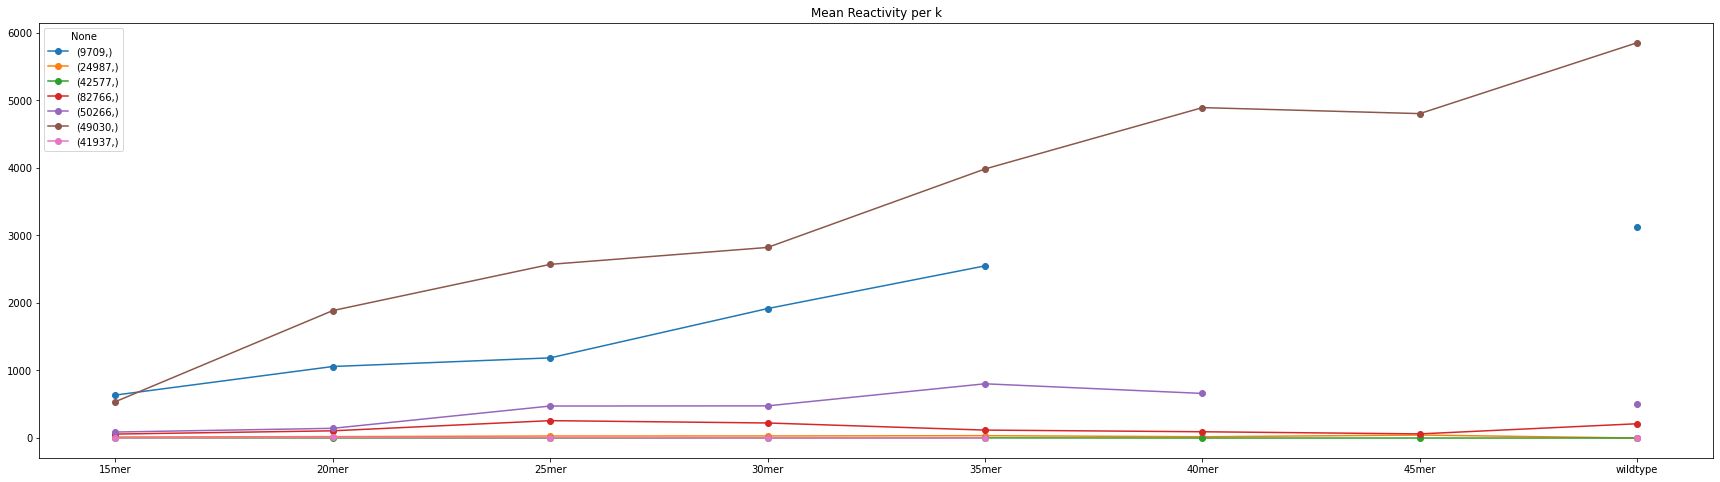

In [50]:
rmersdf.plot.line(y=random_seqs, title = str("Mean Reactivity per k"), marker = "o")


<AxesSubplot:title={'center':'Mean Reactivity per k over all wildtypes'}>

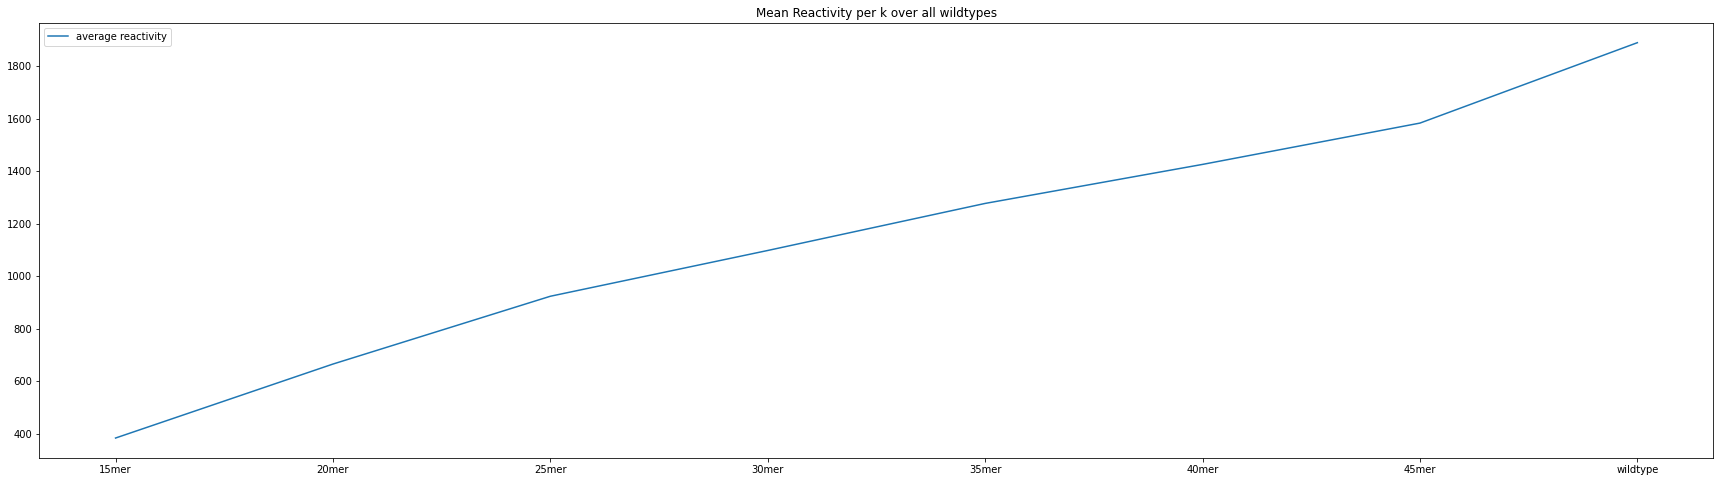

In [51]:
rdf = pd.DataFrame(index=mers,columns=["average reactivity"])
for mer in mers:
    rdf.loc[mer,"average reactivity"] = np.mean(reactivity.loc[reactivity.index.str.contains(mer),"reactivity"])
rdf.plot.line(y="average reactivity", title = str("Mean Reactivity per k over all wildtypes"))

In [52]:
# position of most reactive 15mer overlap with most reactive 20mer?
    # for each wildtype answer Q and get TP rate

# Probe Sensitivity 

In [53]:
t = []
for w in merscan_wt:
    t.append(w)
wts = random.choices(t, k=5)
wts

['1334', '89961', '19141', '13043', '89041']

In [54]:
wts = ["23325","7840","52932","53212"]
wts

['23325', '7840', '52932', '53212']

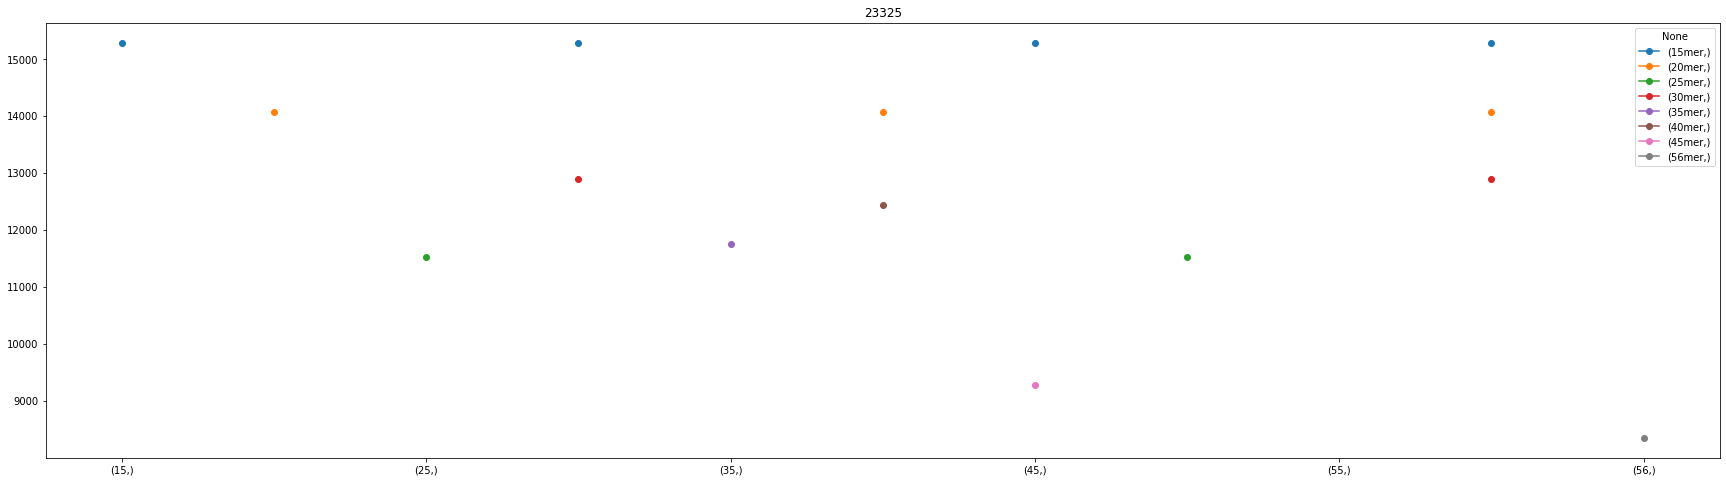

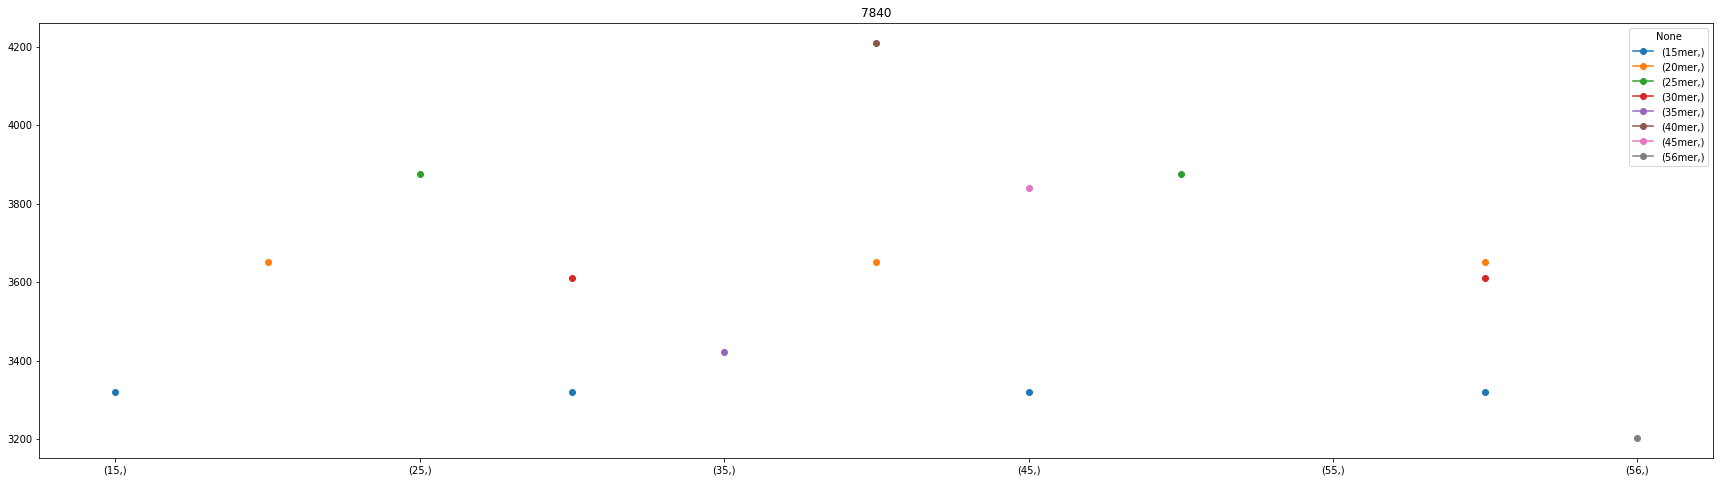

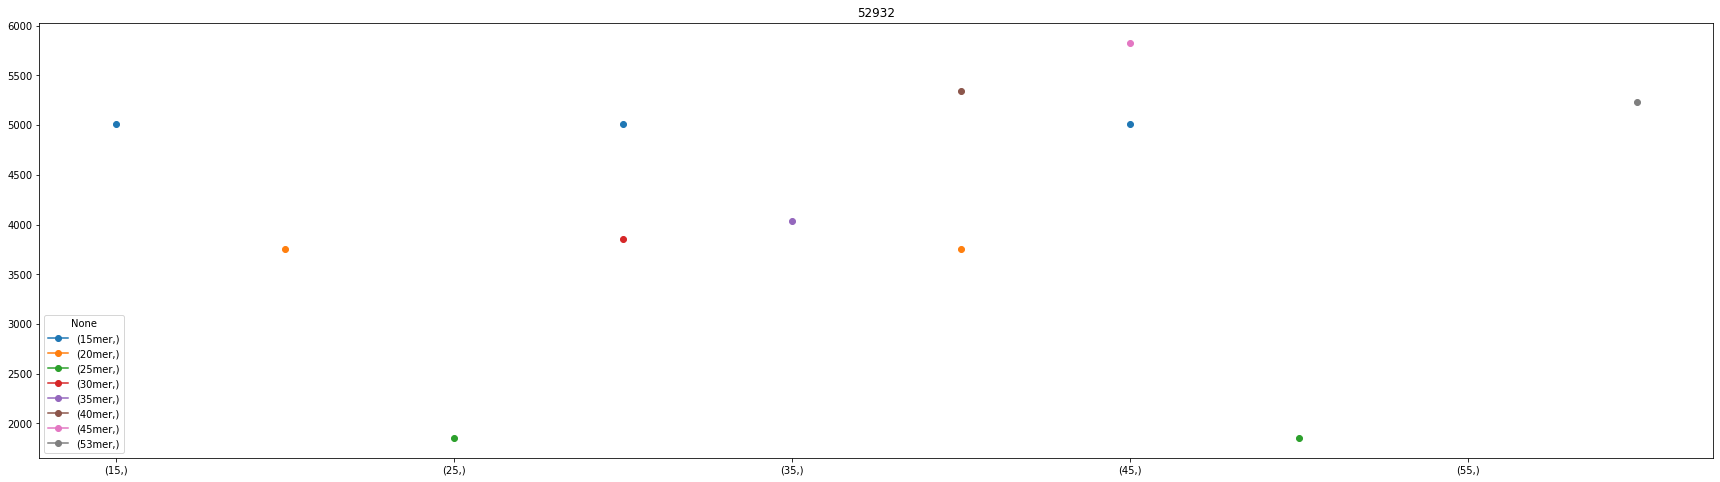

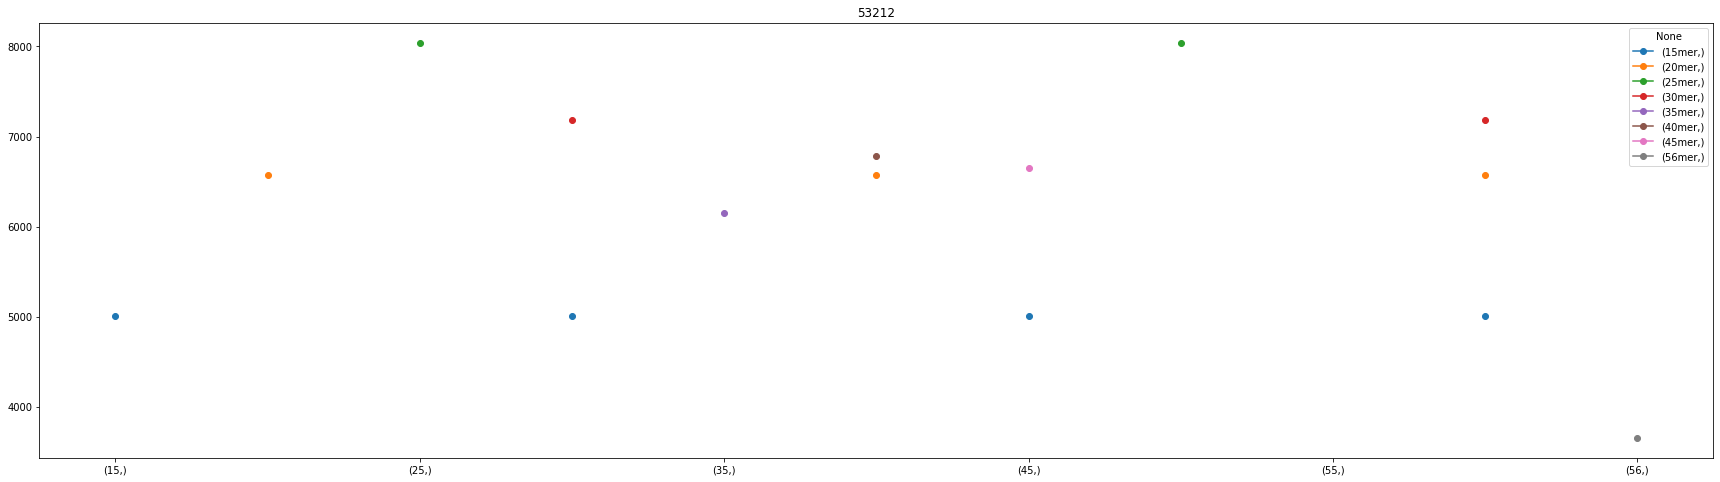

In [55]:
for wt in wts: 
    seqbin = hfc2[hfc2.index.str.startswith(wt)]
    wtlength = len(seqbin[seqbin.index.str.contains("wildtype")].index.str.split("_")[0][2])
    seqbin.index = seqbin.index.str.replace("wildtype",str(wtlength)+"mer")
    mers = np.unique([split[1] for split in seqbin.index.str.split("_")])
    cdf = pd.DataFrame(index=[np.arange(start=15, stop=wtlength+5, step=5)],columns=[mers])
    for mer in mers:
        merInt = int(mer[:2])
        maxmers = []
        merset = seqbin[seqbin.index.str.contains(mer)]
        mersetsum = merset.sum(axis = 1)
        maxmer = mersetsum.argmax()
        maxmers.append(maxmer)
        combinedmax = mersetsum.max()
        cdf.loc[merInt,mer] = combinedmax
        iteration = 2
        while merInt * iteration < wtlength+5:
            maxmers.append(0)
            for i in range(len(merset)):
                combined_rows = merset.iloc[[i]+maxmers[:iteration-1],:].sum(axis = 0)
                combined_rows[combined_rows>0] = 1
                if combined_rows.sum() > combinedmax:
                    combinedmax = combined_rows.sum()
                    maxmers[iteration-1] = i
            cdf.loc[iteration*merInt,mer] = combinedmax
            iteration += 1
    cdf.plot.line(y=mers, title = str(wt), marker='o')

56mers checked: 309 , 56mers>0: 235


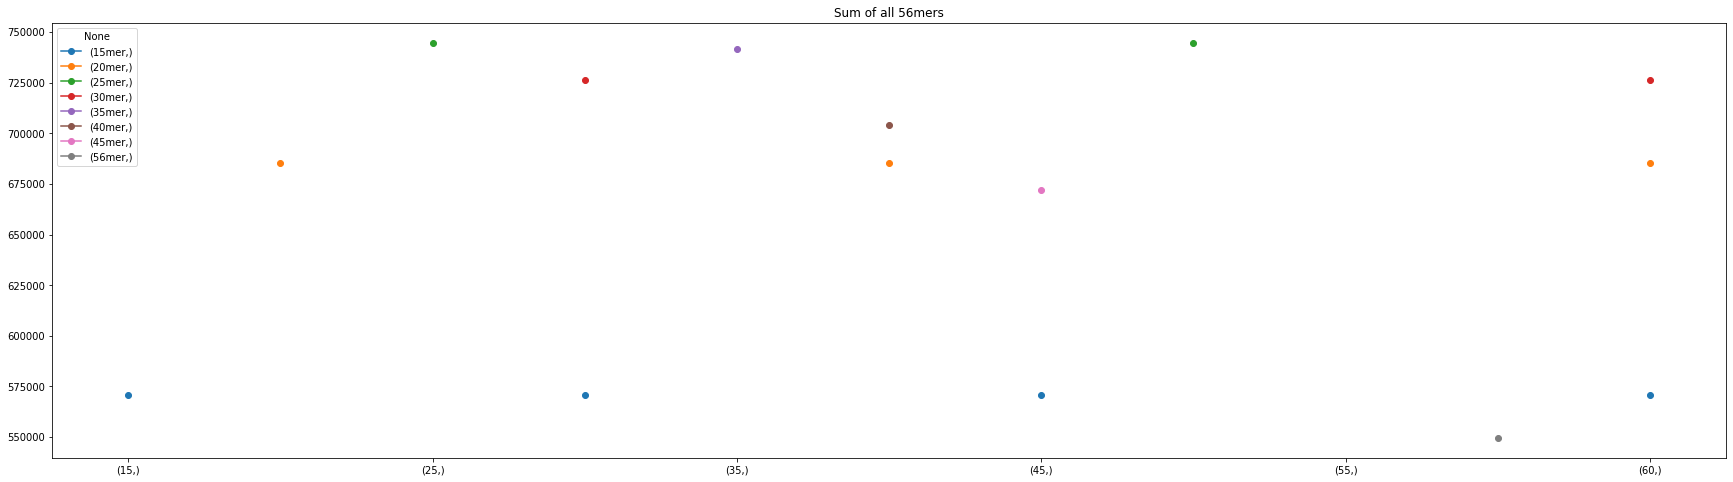

In [57]:
#combined plot!
seqbin = hfc2[hfc2.index.str.startswith("23325")] # random for initializing the cdf
seqbin.index = seqbin.index.str.replace("wildtype",str(wtlength)+"mer")
mers = np.unique([split[1] for split in seqbin.index.str.split("_")])
cdf = pd.DataFrame(index=[np.append(np.arange(start=15, stop=56, step=5),[56,60])],columns=[mers])
no_56mers = 0
no_56mers_used = 0
for wt in merscan_wt: 
    seqbin = hfc2[hfc2.index.str.startswith(wt+"_")]
    wtlength = len(seqbin[seqbin.index.str.contains("wildtype")].index.str.split("_")[0][2])
    if wtlength == 56:
        no_56mers += 1
        if seqbin[seqbin.index.str.contains("wildtype")].sum(axis=1).squeeze() > 0:
            no_56mers_used += 1
            seqbin.index = seqbin.index.str.replace("wildtype",str(wtlength)+"mer")
            mers = np.unique([split[1] for split in seqbin.index.str.split("_")])
            for mer in mers:
                merInt = int(mer[:2])
                maxmers = []
                merset = seqbin[seqbin.index.str.contains(mer)]
                mersetsum = merset.sum(axis = 1)
                maxmer = mersetsum.argmax()
                maxmers.append(maxmer)
                combinedmax = mersetsum.max()
                if cdf.loc[merInt,mer].isnull().squeeze():
                    cdf.loc[merInt,mer] = combinedmax
                else:
                    cdf.loc[merInt,mer] += combinedmax
                iteration = 2
                while merInt * iteration < 61:
                    maxmers.append(0)
                    for i in range(len(merset)):
                        combined_rows = merset.iloc[[i]+maxmers[:iteration-1],:].sum(axis = 0)
                        combined_rows[combined_rows>0] = 1
                        if combined_rows.sum() > combinedmax:
                            combinedmax = combined_rows.sum()
                            maxmers[iteration-1] = i
                    if cdf.loc[iteration*merInt,mer].isnull().squeeze():
                        cdf.loc[iteration*merInt,mer] = combinedmax
                    else:
                        cdf.loc[iteration*merInt,mer] += combinedmax
                    iteration += 1
cdf.plot.line(y=mers, title = str("Sum of all 56mers"), marker='o')
print("56mers checked:", no_56mers, ", 56mers>0:", no_56mers_used)

In [58]:
cdf

,15mer,20mer,25mer,30mer,35mer,40mer,45mer,56mer
15,570806.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,685577.02,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,744815.97,NaN,NaN,NaN,NaN,NaN
30,570806.26,NaN,NaN,726185.4,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,741479.02,NaN,NaN,NaN
40,NaN,685577.02,NaN,NaN,NaN,704172.64,NaN,NaN
45,570806.26,NaN,NaN,NaN,NaN,NaN,672073.13,NaN
50,NaN,NaN,744815.97,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549514.01


Number of 56mers: 235


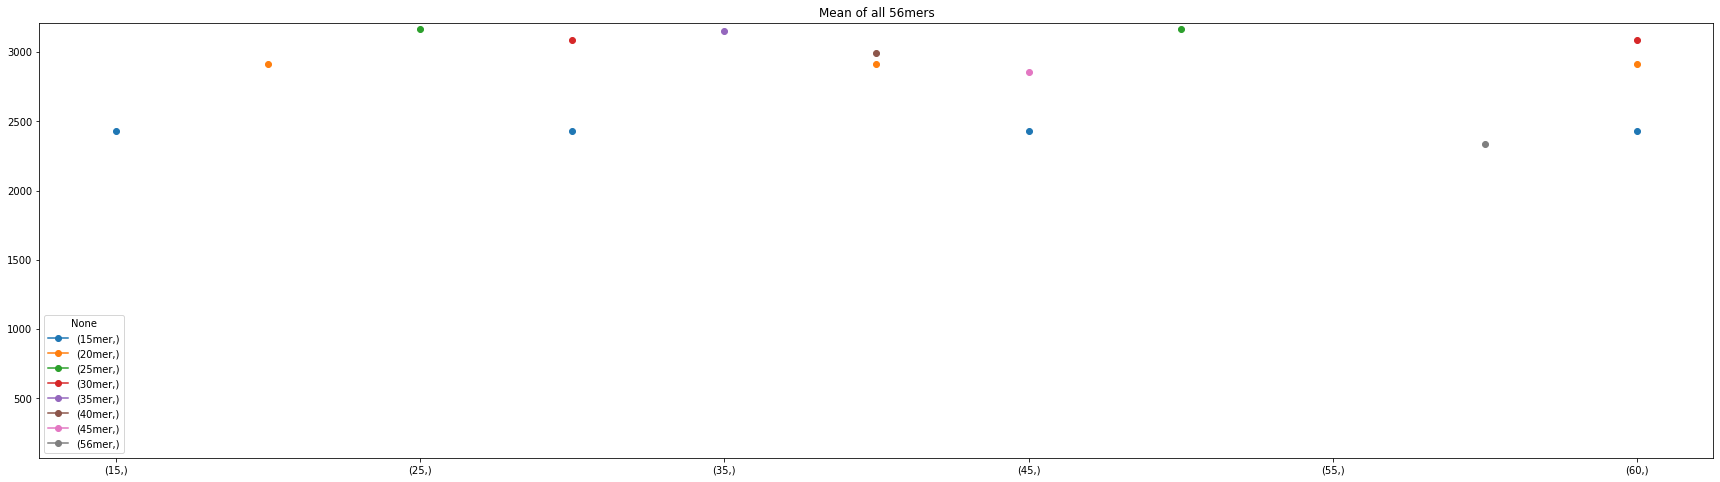

In [59]:
cdfNorm = cdf/no_56mers_used
print("Number of 56mers:", no_56mers_used)
ax = cdfNorm.plot.line(y=mers, title = str("Mean of all 56mers"), marker='o')
ax.set_ylim(ymin=70)
plt.show(ax)